In [1]:
import py3Dmol
import copy
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import rdBase
from rdkit.Chem import rdMolAlign
from rdkit.Chem import rdMolDescriptors
import numpy as np;

RDKit WARNING: [19:03:55] Enabling RDKit 2019.09.1 jupyter extensions


In [2]:
print(rdBase.rdkitVersion)

2019.09.1


In [3]:
p = AllChem.ETKDGv2()
p.verbose = True

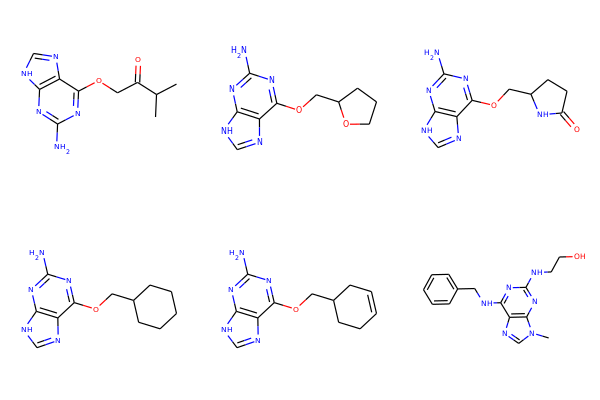

In [4]:
mols = [m for m in Chem.SDMolSupplier("cdk2.sdf") if m != None][:6]
for mol in mols:
    mol.RemoveAllConformers()
hmols_1 = [Chem.AddHs(m) for m in mols]
hmols_2 = copy.deepcopy(hmols_1)
# Generate 100 conformers per each molecule
for mol in hmols_1:
    # AllChem.EmbedMolecule(mol, p, )
    AllChem.EmbedMultipleConfs(mol, 100, p)

for mol in hmols_2:
    # AllChem.EmbedMolecule(mol, p, )
    AllChem.EmbedMultipleConfs(mol, 100, p)
Draw.MolsToGridImage(mols)

In [5]:
crippen_contribs = [rdMolDescriptors._CalcCrippenContribs(mol) for mol in hmols_1]
crippen_ref_contrib = crippen_contribs[0]
crippen_prob_contribs = crippen_contribs[1:]
ref_mol1 = hmols_1[0]
prob_mols_1 = hmols_1[1:]

mmff_params = [AllChem.MMFFGetMoleculeProperties(mol) for mol in hmols_2]
mmff_ref_param = mmff_params[0]
mmff_prob_params = mmff_params[1:]
ref_mol2 = hmols_2[0]
prob_mols_2 = hmols_2[1:]

print(ref_mol1.GetNumConformers())


100


In [6]:
p_crippen = py3Dmol.view(width=400, height=200)
p_crippen.addModel(Chem.MolToMolBlock(ref_mol1), 'sdf')
crippen_score = []
for idx, mol in enumerate(prob_mols_1):
    tempscore = []
    for cid in range(100):
        crippenO3A = rdMolAlign.GetCrippenO3A(mol, ref_mol1, crippen_prob_contribs[idx], crippen_ref_contrib, cid, 0)
        crippenO3A.Align()
        tempscore.append(crippenO3A.Score())
    best = np.argmax(tempscore)
    p_crippen.addModel(Chem.MolToMolBlock(mol, confId=int(best)), 'sdf')
    crippen_score.append(tempscore[best])
p_crippen.setStyle({'stick':{}})
p_crippen.render();

In [7]:
print(crippen_score)

[103.21903540692179, 103.31809496605497, 102.2685713370804, 102.52326451630294, 92.85138296508862]


In [11]:
p_O3A = py3Dmol.view(width=400, height=200)
p_O3A.addModel(Chem.MolToMolBlock(ref_mol2), 'sdf')
pyO3A_score = []
for idx, mol in enumerate(prob_mols_2):
    tempscore = []
    for cid in range(100):
        pyO3A = rdMolAlign.GetO3A(mol, ref_mol2, mmff_prob_params[idx], mmff_ref_param, cid, 0)
        pyO3A.Align()
        tempscore.append(pyO3A.Score())
    best = np.argmax(tempscore)
    p_O3A.addModel(Chem.MolToMolBlock(mol, confId=int(best)), 'sdf')
    pyO3A_score.append(tempscore[best])
p_O3A.setStyle({'stick':{'colorscheme':'cyanCarbon'}})
p_O3A.render()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [9]:
print(pyO3A_score)

[147.03837072227168, 147.10682777572848, 143.83202703274338, 144.7205528353425, 129.81735940299723]
